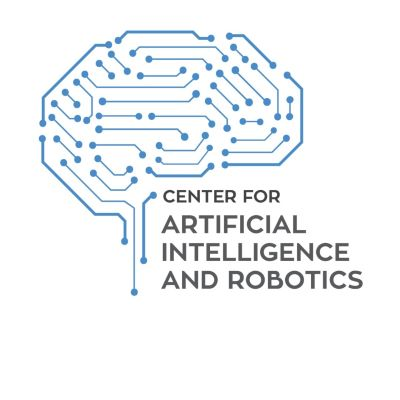

<div style="direction:rtl">
خب، در این بخش به سراغ اولین تسک بخش دیتا ساینس می رویم. برای این بخش ما از دیتاست معروف 911 استفاده می کنیم که لینک آن در پایین قرار داده شده است.

[911-Kaggle](https://www.kaggle.com/mchirico/montcoalert)

<div style="direction:rtl">
4 کتابخانه ی مورد نیازمان را ایمپورت کنید.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="direction:rtl">
دیتاستی که در اختیارتان قرار گرفته را با نام df بخوانید.

In [2]:
df= pd.read_csv('911.csv')

<div style="direction:rtl">
نگاه خلاصه به سطور دیتاست، دریافت اطلاعات کلی و اطلاعات آماری.

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


<div style="direction:rtl">
پیمانکار قصد دارد که تعدادی ایستگاه خدمات اورژانسی در شهر هایی که در آن ها تقاضا زیاد است تاسیس نماید، به این منظور 5 زیپ کدی که بیشتری تماس را با 911 داشته اند بیابید.

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<div style="direction:rtl">
تحلیل بالا را برای 5 شهر پر تقاضا نیز انجام دهید.

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<div style="direction:rtl">
قصد داریم تا ارزیابی روی تعداد خدمات ارائه شده توسط سرویس 911 انجام دهیم، به این منظور تعداد موضوعات یکتایی که در مورد آن تماس حاصل شده را به دست آورید.

In [8]:
df['title'].value_counts().count()

110

<div style="direction:rtl">
در ستون موضوعات، قبل از بیان اصل مشکل، دسته بندی آن نیز مشخص شده است، مانند EMS یا Fire. ستون جدیدی تحت عنوان Reason بسازید و این دسته بندی ها را در آن ذخیره کنید.

In [6]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


<div style="direction:rtl">
با توجه به ستونی که ساختید، تعداد تماس ها به 911 برای هر کدام از این موضوعات کلی چه مقدار بوده؟

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<div style="direction:rtl">
تحلیل بالا را مصور سازی کنید.

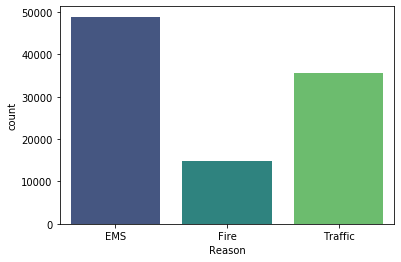

In [14]:
fig=plt.figure()
sns.countplot(x='Reason',data=df)

<div style="direction:rtl">
حالا می خواهیم کمی با دیتاهای زمانی سر وکله بزنیم. تایپ یکی از داده های این ستون را نمایش دهید.

In [8]:
type(df['timeStamp'][0])

str

In [12]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

In [17]:
df['timeStamp'].loc[0]

'2015-12-10 17:40:00'

In [16]:
df.loc[0,'timeStamp']

'2015-12-10 17:40:00'

<div style="direction:rtl">
با کمک متد pd.to_datetime این ستون را به تایپ datetime تبدیل کنید.
<div style="direction:rtl">
برای اطلاعات بیشتر می توانید به لینک زیر مراجعه کنید.

[pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [7]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

<div style="direction:rtl">
پس از انجام این کار، باز هم تایپ یکی از داده های این ستون را بررسی کنید.

In [8]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

<div style="direction:rtl">
حالا که تایپ این ستون را به datetime تبدیل کردیم، می توانیم ویژگی های مختلفی را از آن استخراج کنیم که یک نمونه از آن را در پایین مشاهده می کنید:

In [9]:
time = df['timeStamp'].iloc[0]
print(df['timeStamp'].iloc[0])
print(time.hour)
print(time.minute)

2015-12-10 17:40:00
17
40


<div style="direction:rtl">
با تحقیق و جست و جو در این ویژگی ها ، سه ستون Hour, Month, Day of Week را در این دیتافریم بسازید.

In [15]:
df['Day of Week']=df['timeStamp'].apply(lambda x:x.day_of_week)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,3,12,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,3,12,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,3,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2,8,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2,8,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2,8,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2,8,11


<div style="direction:rtl">
دیکشنری زیر را با کمک map رو ستون day of week پیاده نمایید.
    map از اپلای سریع تر است

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [12]:
df['Day of Week']=df['Day of Week'].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Wed,8,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Wed,8,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,Wed,8,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,Wed,8,11


In [16]:
df['Day of Week']=df['Day of Week'].apply(lambda x: dmap[x])

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Wed,8,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Wed,8,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,Wed,8,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,Wed,8,11


<div style="direction:rtl">
نمودار کتگوریکال زیر را برای روزهای هفته به تفکیک دلیل ترسیم کنید.
<div style="direction:rtl">
پ.ن: به محل legend دقت کنید و برای قرار دادن آن در آن محل از ویژگیbbox_to_anchor کمک بگیرید.

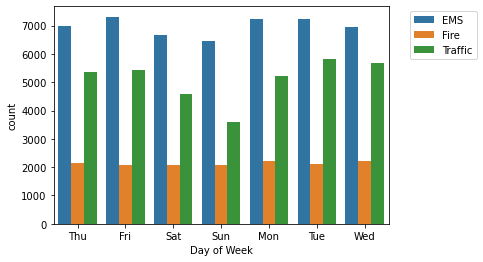

In [35]:
fig=plt.figure()
sns.countplot(x=df['Day of Week'],data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1))

<div style="direction:rtl">
تحلیل بالا را برای ماه ها نیز انجام دهید.

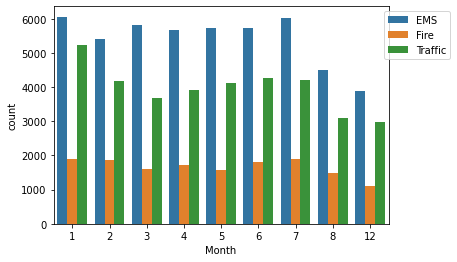

In [44]:
fig=plt.figure()
sns.countplot(x=df['Month'],data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.2, 1))

<div style="direction:rtl">
چه ناهنجاری را در پلات بالا مشاهده می کنید؟

<div style="direction:rtl">
مشاهده می شود که ....

<div style="direction:rtl">
بله درست است، مشاهده می کنیم که داده های تعدادی از ماه ها موجود نیست. خب راه حل چیست؟ احتمالا باید دورن یابی کنیم. برای این منظور دیتاستی را با ایندکس های ماه ها تشکیل دهید که در آن تعداد یکی از ستون ها به دلخواه به نمایش گذاشته شده باشد و نام آن را byMonth می گذاریم.

In [17]:
byMonth=pd.DataFrame({'Reason':df['Month'].value_counts(),'Month':np.sort(df['Month'].unique())}).set_index('Month')
byMonth

,Reason
Month,
1,13205
2,12137
3,11786
4,11467
5,11423
6,11326
7,11101
8,9078
12,7969


In [40]:
df.groupby('Month').count()['Reason']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: Reason, dtype: int64

In [48]:
byMonth= df.groupby('Month').agg({'Reason':'count'})

<div style="direction:rtl">
حالا برای این دیتاست یک .plot() ساده انجام می دهیم تا بر اساس ایندکس های دیتاست، درون یابی انجام شود.
<div style="direction:rtl">
توجه داشته باشید که پلات دیفالت پانداز، پلات خطی است، یعتی به عبارتی : 
<div style="direction:ltr">    
    .plot() = .plot.line()

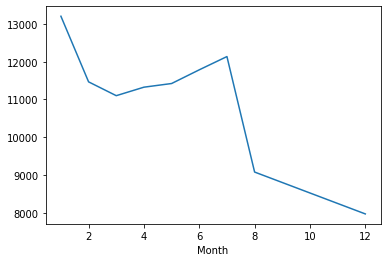

In [50]:
byMonth.plot()

<div style="direction:rtl">
حالا سعی کنید به همان داده های بالا با ابزار های مصورسازی رگرسیون، یک خط فیت کنید و این روند را از حالت غیر خطی به خطی نمایش دهید.ناحیه آبی فاصله اطمینان 95% را برای خط نشان می دهد.
    

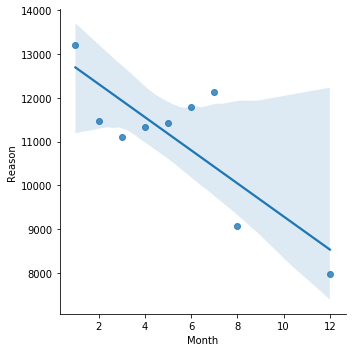

In [52]:
fig=plt.figure()
byMonth=pd.DataFrame({'Reason':df['Month'].value_counts(),'Month':np.sort(df['Month'].unique())})
sns.lmplot(x='Month',y='Reason',data=byMonth)

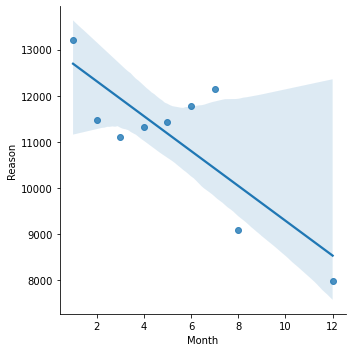

In [49]:
sns.lmplot(x='Month',y='Reason',data=byMonth.reset_index())

<div style="direction:rtl">
حالا ویژگی Date را از ستون تاریخ استخراج کنید و آن را در یک ستون مجزا ذخیره کنید و تعداد تماس ها را بر اساس تاریخ پلات خطی کنید.

In [20]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Month,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Wed,8,11,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Wed,8,11,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,Wed,8,11,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,Wed,8,11,2016-08-24


<AxesSubplot:>

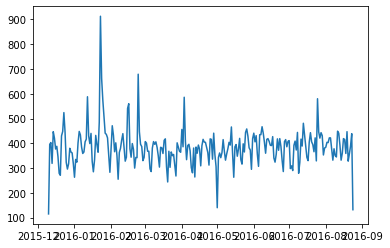

In [33]:
df['Date'].value_counts().plot()

<AxesSubplot:xlabel='Date'>

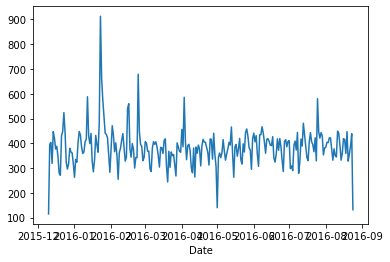

In [34]:
df.groupby('Date')['Date'].count().plot()

<div style="direction:rtl">
با کمک کوئری زدن، پلات بالا را به تفکیک دلایل مختلف ترسیم نمایید و برای هر پلات هم تایتل بزنید.

Text(0.5, 1.0, 'Traffic')

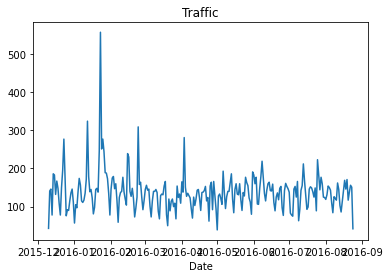

In [44]:
df[df['Reason']=='Traffic'].groupby('Date')['Date'].count().plot().set_title('Traffic')

Text(0.5, 1.0, 'Fire')

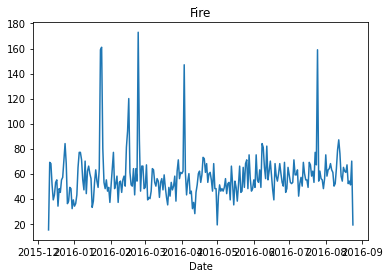

In [45]:
df[df['Reason']=='Fire'].groupby('Date')['Date'].count().plot().set_title('Fire')

Text(0.5, 1.0, 'EMS')

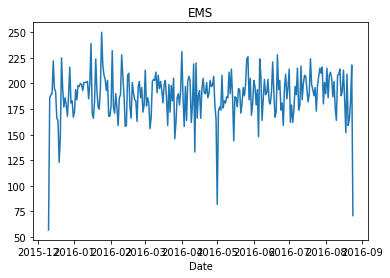

In [46]:
df[df['Reason']=='EMS'].groupby('Date')['Date'].count().plot().set_title('EMS')

<div style="direction:rtl">
با مراجعه به لینک زیر، کمی راجع به متد unstack تحقیق نمایید.

[unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

<div style="direction:rtl">
همان طور که احتمالا مطالعه نمودید، کار این متد این است که در ایندکس های سلسه مراتبی، یک لایه را به ستون تبدیل نماید.
موارد استفاده ی این متد وقتیست که به دلایلی گروپ بای چند لایه کردید و میخواهید یک لایه را در ستون نمایش دهید.     
با استفاده از این متد جدول پایین را تشکیل دهید و نام آن را dayHour قرار دهید.
<div style="direction:rtl">
پ.ن: مقادیر درون جدول نمایانگر تعداد می باشد.

In [48]:
## with groupby and unstack
df.groupby(['Day of Week','Hour'])['Reason'].count().unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<div style="direction:rtl">
حالا همین جدول بالا را با کمک pivot_table تشکیل دهید.

In [51]:
## with pivot table
DayHour= df.pivot_table(index='Day of Week',columns='Hour',values='Reason',aggfunc='count')
DayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<div style="direction:rtl">
حالا هیت مپ را برای جدول بالا ترسیم نمایید.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

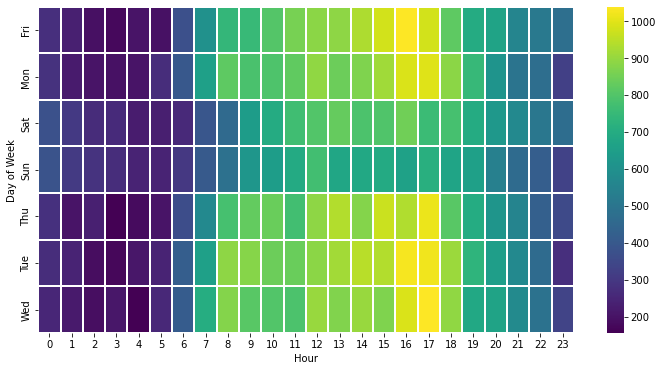

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour,cmap='viridis',linewidths=0.1)

<div style="direction:rtl">
کلاستر مپ را هم برای دیتاست بالا ترسیم نمایید.

<Figure size 864x432 with 0 Axes>

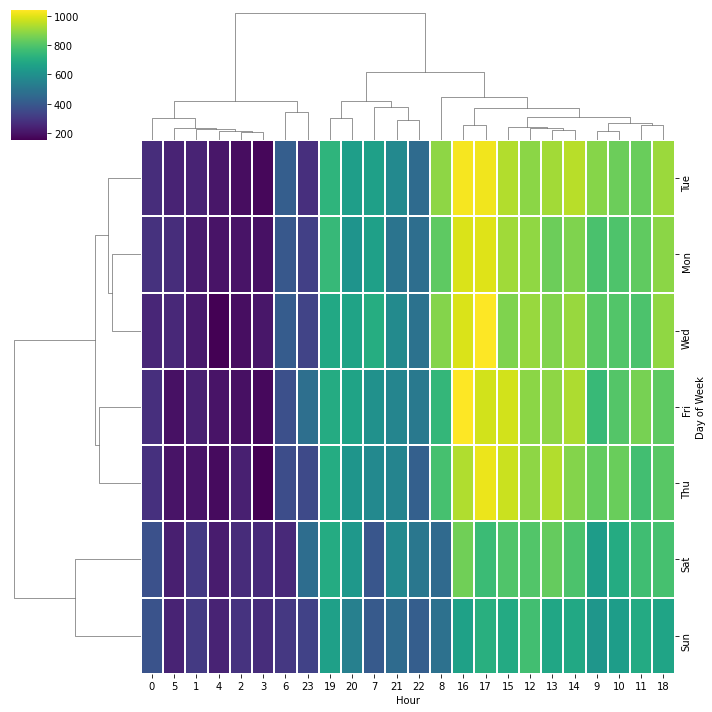

In [55]:
plt.figure(figsize=(12,6))
sns.clustermap(DayHour,cmap='viridis',linewidths=0.1)

<div style="direction:rtl">
همان جدول بالا را با دو روش برای ماه هم ترسیم نمایید و همان پلات ها را ترسیم نمایید.

In [56]:
df.groupby(['Day of Week','Month'])['Reason'].count().unstack()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [58]:
DayMonth= df.pivot_table(index='Day of Week',columns='Month',values='Reason',aggfunc='count')
DayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

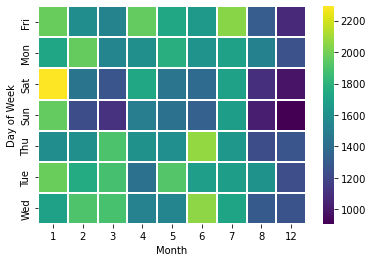

In [59]:
sns.heatmap(DayMonth,cmap='viridis',linewidths=0.1)

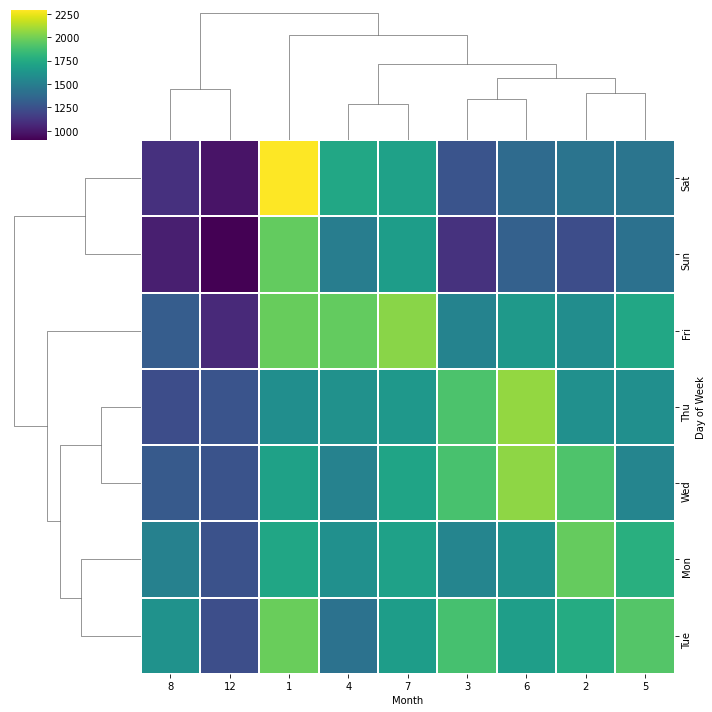

In [60]:
sns.clustermap(DayMonth,cmap='viridis',linewidths=0.1)

<div style="direction:rtl">

## خسته که نشدید؟ تازه شروع شده :)